In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Variation of energy upon switching the direction of a spin at position (i,j). 
# 'grid' is the lattice containing the spins
# 'J' is the coupling energy between spins
def VarHamiltonian(J,grid,i,j):
    (sx,sy) = grid.shape
    energy = 2*J*grid[i][j]*(grid[(i+1)%sx][j]+grid[(i-1)%sx][j]+grid[i][(j+1)%sy]+grid[i][(j-1)%sy])
    return energy

# Total magnetization of the lattice obtained by summing the spins altogether
# 'grid' is the lattice containing the spins
def Magnetization(grid):
    return grid.sum();

# Energy of the lattice for a given configuration
# 'grid' is the lattice containing the spins
# 'J' is the coupling energy between spins
def Energy(J,grid):
    (sx,sy) = grid.shape
    energy = 0;
    for i in range(0,sx):
        for j in range(0,sy):
            energy -= J*grid[i][j]*(grid[(i+1)%sx][j]+grid[(i-1)%sx][j]+grid[i][(j+1)%sy]+grid[i][(j-1)%sy])
    return energy  

# Modification of the lattice following the (Monte-Carlo) Metropolis algorithm
# 'grid' is the lattice containing the spins
# 'J' is the coupling energy between spins
# 'beta' is the inverse thermal energy
def MonteCarloStep(grid,J,beta):
    (sx,sy) = grid.shape
    i = np.random.randint(sx)
    j = np.random.randint(sy)
    
    deltaEnergy = VarHamiltonian(1,grid,i,j)
            
    if (deltaEnergy <= 0):
        grid[i,j] *= -1
            
    elif (np.exp(-beta*deltaEnergy) > np.random.rand()):
        grid[i,j] *= -1

    return grid

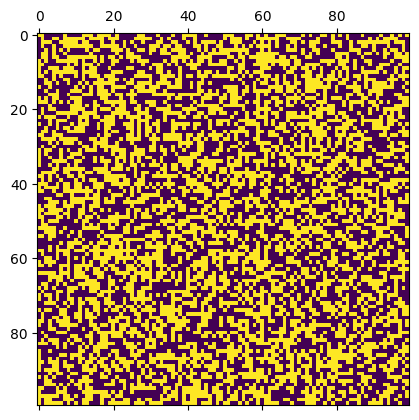

-134


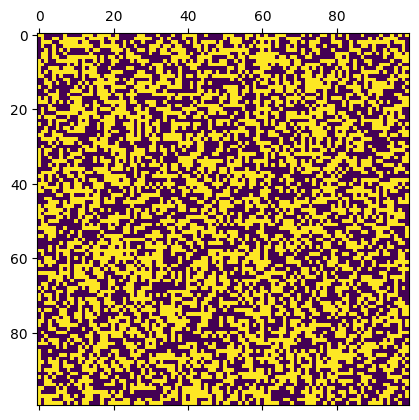

-132
-24


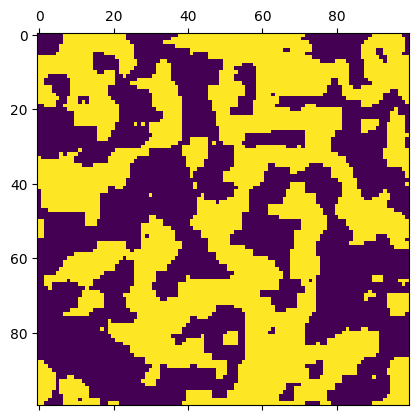

-24
-32120


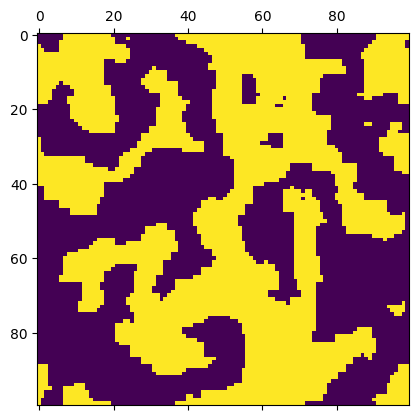

-284
-34576


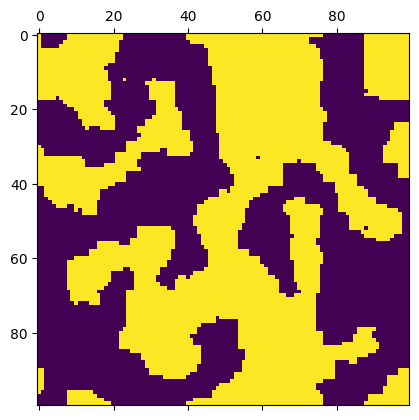

-96
-35512


KeyboardInterrupt: 

In [4]:
# ---------------------------------------------------------------------------
# --------------------------------- MAIN ------------------------------------
# ---------------------------------------------------------------------------

# Definition of key variables -----------------------------------------------

nx = 100; # size of the lattice along the x-direction
ny = 100; # size of the lattice along the y-direction
beta = 1; # inverse thermal energy for Montecarlo step
tMax = nx*ny*50; # duration of the simulation (proportional to the lattice area)

# Definition of the lattice and associated memory ---------------------------

lattice = np.random.choice([-1,1], size=(nx,ny)) # initialize the lattice with randomly selected spins (uniform distribution)
magn = np.array([Magnetization(lattice)])  # store the lattice magnetization at each step
en = np.array([Energy(1,lattice)])  # store the lattice energy at each step

plt.matshow(lattice) # visualize initial lattice
plt.show()

# Time propagation ----------------------------------------------------------

for t in range(0,tMax):
    
    i = np.random.randint(nx) # select a random x-position to possibly flip the spin 
    j = np.random.randint(ny) # select a random y-position to possibly flip the spin
    
    deltaEnergy = VarHamiltonian(1,lattice,i,j) # check energy variation upon spin flip
    
    # if the energy is decreased, accept the change 
    if (deltaEnergy <= 0):
        lattice[i,j] *= -1
        magn = np.append(magn,magn[-1]+2*lattice[i,j])
        en = np.append(en,en[-1]+deltaEnergy)
    
    # if the energy is increased, accept the change with probability exp(-beta*dU)
    elif (np.exp(-beta*deltaEnergy) > np.random.rand()):
        lattice[i,j] *= -1
        magn = np.append(magn,magn[-1]+2*lattice[i,j])
        en = np.append(en,en[-1]+deltaEnergy)
    # if energy is not changed, to nothing            
    else:
        magn = np.append(magn,magn[-1])
        en = np.append(en,en[-1])
    
    # Visualize lattice at periodic time intervals      
    if (t%(10*nx*ny) == 0):
        plt.matshow(lattice)
        plt.show()   
        print(Magnetization(lattice))
        print(Energy(1,lattice))

# Visualization  (not working) ------------------------------------------------ 

#plt.plot(magn)
#plt.show()

#plt.plot(en)
#plt.show()

-58


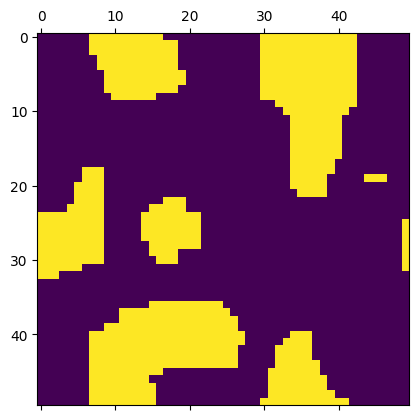

-1038
-8880.0


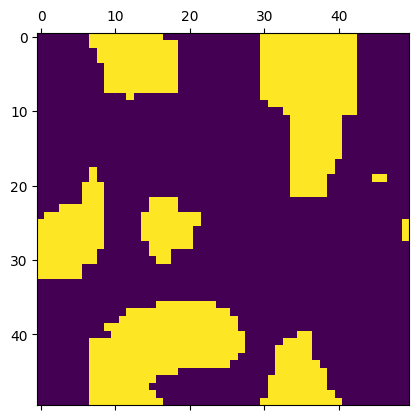

-1092
-8888.0


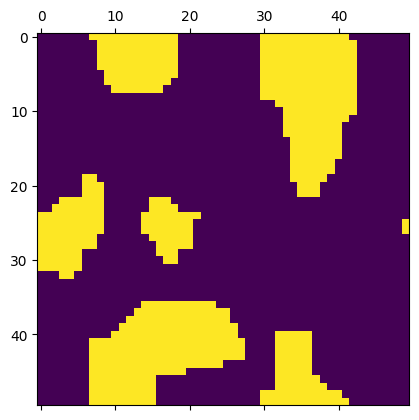

-1130
-8944.0


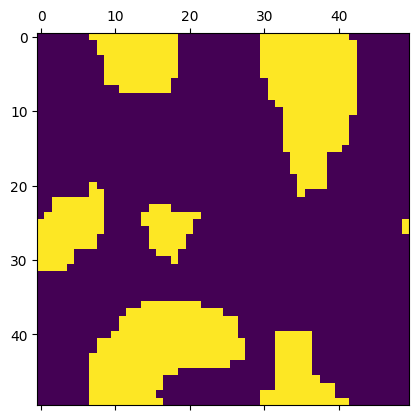

-1176
-8968.0


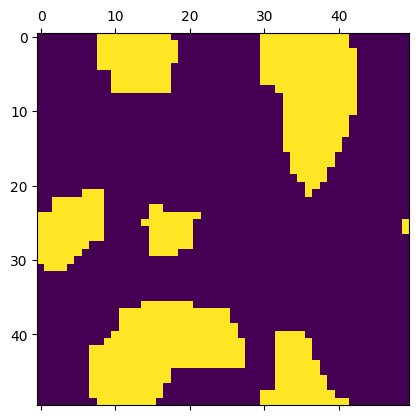

-1186
-8984.0


In [23]:
# ---------------------------------------------------------------------------
# --------------------------------- MAIN (another one) ----------------------
# ---------------------------------------------------------------------------

nx = 50;
ny = 50;

KbT = 0.5;
J = 1.0;

nEquilibation = nx*ny*25;
nSampling = nx*ny*5;

lattice = np.random.choice([-1,1], size=(nx,ny))

plt.matshow(lattice)
plt.show()

print(Magnetization(lattice))
magn = np.array([Magnetization(lattice)])
en = np.array([Energy(J,lattice)])

# Equilibration

for t in range(0,nEquilibation):
    
    MonteCarloStep(lattice,J,1./KbT)
    
meanE = 0;
meanE2 = 0;
meanM = 0;
meanM2 = 0;
    
for t in range(0,nSampling):
    
    MonteCarloStep(lattice,J,1./KbT) 
    totalEnergy = Energy(J,lattice)
    totalMagn = Magnetization(lattice)
    
    meanE += totalEnergy
    meanE2 += totalEnergy*totalEnergy
    meanM += totalMagn
    meanM2 += totalMagn*totalMagn
            
    if (t%(nx*ny) == 0):
        plt.matshow(lattice)
        plt.show()   
        print(Magnetization(lattice))
        print(Energy(J,lattice))

meanE /= nSampling*nx*ny
meanE2 /= nSampling*nx*nx*ny*ny
meanM /= nSampling*nx*ny
meanM2 /= nSampling*nx*nx*ny*ny

In [24]:
meanE2-meanE*meanE

0.00026327733475817183

In [25]:
meanM2-meanM*meanM

0.0004425996111503683